# Data Transformation

In [1]:
import pandas as pd

order = pd.read_csv('../../../2_data/explored/order.csv')
order['CREATE_DATE'] = pd.to_datetime(order['CREATE_DATE'])
order['UPDATE_DATE'] = pd.to_datetime(order['UPDATE_DATE'])
order.head()

,ORDER_ID,CUSTOMER_ID,BPCODE,CREATE_DATE,UPDATE_DATE,STATUS
0,2024,22,1100700373,2015-10-05 21:05:45,2015-10-05 21:05:45,PENDING
1,2241,4122,1100702444,2015-10-15 18:51:08,2015-10-15 19:03:44,PENDING
2,2321,4223,1100702550,2015-10-16 15:36:42,2015-10-16 15:42:23,PAID_SUCCESS
3,2341,4122,1100702444,2015-10-16 23:45:30,2015-10-16 23:54:33,PENDING
4,2422,4527,1100702884,2015-10-17 18:35:16,2015-10-17 18:45:13,PENDING


In [2]:
len(order)

11916

เลือกเอาเฉพาะที่ CREATE_DATE < Test Time 

In [3]:
import datetime

test_time = datetime.date.today() - datetime.timedelta(days=180)
new_order = order[order['CREATE_DATE'] < test_time]
print(len(new_order))
new_order.head()

9536


,ORDER_ID,CUSTOMER_ID,BPCODE,CREATE_DATE,UPDATE_DATE,STATUS
0,2024,22,1100700373,2015-10-05 21:05:45,2015-10-05 21:05:45,PENDING
1,2241,4122,1100702444,2015-10-15 18:51:08,2015-10-15 19:03:44,PENDING
2,2321,4223,1100702550,2015-10-16 15:36:42,2015-10-16 15:42:23,PAID_SUCCESS
3,2341,4122,1100702444,2015-10-16 23:45:30,2015-10-16 23:54:33,PENDING
4,2422,4527,1100702884,2015-10-17 18:35:16,2015-10-17 18:45:13,PENDING


จะเห็นว่าจำนวน order ลดน้อยลงตามเวลา

In [4]:
item = pd.read_csv('../../../2_data/explored/order_item.csv')
item.head()

,ORDER_ID,ORDER_ITEM_ID,MATNR,QUANTITY,TOTAL_PRICE
0,2024,2024,19106665,1,2700.0
1,2024,2025,19049635,1,36900.0
2,2241,2221,19086648,1,6900.0
3,2321,2281,19110489,1,7900.0
4,2341,2301,19086648,1,6900.0


Merge ตาราง

In [5]:
order_item = pd.merge(new_order, item, on='ORDER_ID')
order_item.head()

,ORDER_ID,CUSTOMER_ID,BPCODE,CREATE_DATE,UPDATE_DATE,STATUS,ORDER_ITEM_ID,MATNR,QUANTITY,TOTAL_PRICE
0,2024,22,1100700373,2015-10-05 21:05:45,2015-10-05 21:05:45,PENDING,2024,19106665,1,2700.0
1,2024,22,1100700373,2015-10-05 21:05:45,2015-10-05 21:05:45,PENDING,2025,19049635,1,36900.0
2,2241,4122,1100702444,2015-10-15 18:51:08,2015-10-15 19:03:44,PENDING,2221,19086648,1,6900.0
3,2321,4223,1100702550,2015-10-16 15:36:42,2015-10-16 15:42:23,PAID_SUCCESS,2281,19110489,1,7900.0
4,2341,4122,1100702444,2015-10-16 23:45:30,2015-10-16 23:54:33,PENDING,2301,19086648,1,6900.0


In [6]:
new_order_item = order_item.copy()
del new_order_item['ORDER_ID']
del new_order_item['BPCODE']
del new_order_item['CREATE_DATE']
del new_order_item['UPDATE_DATE']
del new_order_item['STATUS']
del new_order_item['ORDER_ITEM_ID']
del new_order_item['TOTAL_PRICE']
new_order_item.head()

,CUSTOMER_ID,MATNR,QUANTITY
0,22,19106665,1
1,22,19049635,1
2,4122,19086648,1
3,4223,19110489,1
4,4122,19086648,1


In [7]:
new_order_item.dtypes

CUSTOMER_ID    int64
MATNR          int64
QUANTITY       int64
dtype: object

Group CUSTOMER_ID กับ MATNR (ถ้าคนๆนึงสั่งสินค้านึงหลายๆครั้งควรนับ QUANTITY เป็นจำนวนรวม)

In [8]:
grouped = new_order_item.groupby(['CUSTOMER_ID','MATNR']).sum().reset_index()
grouped.head()

,CUSTOMER_ID,MATNR,QUANTITY
0,21,19037281,1
1,21,19047928,1
2,21,19110082,1
3,21,19112932,1
4,21,25017251,2


In [28]:
grouped.dtypes

CUSTOMER_ID    int64
MATNR          int64
QUANTITY       int64
dtype: object

แปลงที่ QUANTITY > 1 เป็น 1 เท่านั้น

In [10]:
grouped['QUANTITY'] = 1
grouped.head()

,CUSTOMER_ID,MATNR,QUANTITY
0,21,19037281,1
1,21,19047928,1
2,21,19110082,1
3,21,19112932,1
4,21,25017251,1


เตรียมสำหรับ pivot table

In [11]:
pivot_table = grouped.pivot(index='CUSTOMER_ID', columns='MATNR', values='QUANTITY')
print(pivot_table.shape)
pivot_table.head()

(5406, 3174)


MATNR,19000158,19000346,19000900,19005144,19008811,19008833,19009152,19009245,19011555,19012447,...,59015246,59015248,59015249,59015387,59015388,59015389,59015390,59015391,59015400,59015402
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,,
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Create Model

ฟังก์ชั่นที่จำเป็น

กรณีนี้ action ของ user ต่อ item มีแค่ ซื้อ(1) และไม่ซื้อ(NaN) ซึ่งทำให้ค่าของ score คือ 1,NaN เวลาหา SD จากข้อมูลที่มีเท่านั้น [1,1,1,1,...,1] จะได้ 0 ซึ่งทำให้ไม่สามารถ predict ค่า Score ได้ ดังนั้นการทำ Normalize ในข้อนี้**ไม่จำเป็น**

*Note : Normalization มีประโยชน์มากในกรณีที่ข้อมูลไม่ค่อย sparse (ว่าง) แล้วมีค่าหลากหลาย*

อีกทั้งส่วน Accounting for sinificance พอคิดแบบ CV ด้วยข้อมูลที่เป็น 0,1 แล้วให้ผลเหมือนกัน ดังนั้นไม่ต้องพิจารณาเพิ่มจะได้

In [12]:
import numpy as np

def mean_of_array(x):
    valid_value = x[~np.isnan(x)]
    return np.mean(valid_value)

def std_of_array(x):
    valid_value = x[~np.isnan(x)]
    return np.std(valid_value)

In [50]:
from sklearn.metrics.pairwise import cosine_similarity

def cosine_similarity_between_item(pivot_table_df):
    cv = pivot_table_df.copy().values

    # filter NaN value to 0   
    cv[np.isnan(cv)] = 0

    cv = cosine_similarity(cv.T)        
    column_name_list = list(pivot_table_df)
    cv_df = pd.DataFrame(cv, index=column_name_list, columns=column_name_list)
    return cv_df

check %NaN

In [40]:
all_box = pivot_table.shape[0]*pivot_table.shape[1]
nan_value = sum(sum(~(pivot_table.values==1)))
percent_nan = nan_value*100/all_box
print(percent_nan)

99.9351580463


หาค่า Similarity ระหว่าง item แต่ละชิ้นจากข้อมูลการซื้อของ user

In [151]:
similarity_weight = cosine_similarity_between_item(pivot_table)
similarity_weight.shape

(3174, 3174)

ตรวจสอบค่า Unique

In [108]:
np.unique(similarity_weight.values)[0:20]

array([ 0.        ,  0.01445183,  0.01464583,  0.01506188,  0.01791436,
        0.01838658,  0.01911798,  0.01967224,  0.01967604,  0.01993631,
        0.02023612,  0.02026102,  0.02050662,  0.0208696 ,  0.0209427 ,
        0.02099803,  0.02158664,  0.02160679,  0.02160679,  0.02167775])

check %Zero

In [65]:
def notZeroPercent(matrix):
    all_value = matrix.shape[0]*matrix.shape[1]
    zero_value = sum(sum(~(matrix.values==0)))
    return zero_value*100/all_value

In [70]:
notZeroPercent(similarity_weight)

0.45722392358517872

กรองความสัมพันธ์จิ๊บจ้อยออกไป

In [67]:
def prefiltering_of_neighbors(old_similar_table, thershold):
    new_similar_table = old_similar_table.copy()
    # Negative filtering & Thershold filtering
    new_similar_table[new_similar_table < thershold] = 0
    return new_similar_table

In [130]:
notZeroPercent(prefiltering_of_neighbors(similarity_weight, 0.1))

0.37829021162414056

In [75]:
prefiltering_similarity_weight = prefiltering_of_neighbors(similarity_weight, 0.1)

จากความสัมพันธ์ที่มี เอามา predict ว่าเค้าจะซื้อ(1) หรือไม่ซื้อ(0) แบบ item-based classification

In [99]:
def cs_classification_predicted_score(pivot_table,weight,output_set):
    # initial variable
    score_table = pivot_table.copy()
    number_of_item = score_table.shape[1]
    
    # get NaN index
    nan_index = np.argwhere(np.isnan(score_table).values)
    
    # for loop to predict each NaN and fill value to it       
    for nan_pos in nan_index:
        r_score = np.array([])
        u,i = nan_pos[0],nan_pos[1]
        ru = score_table.values[u,:]
        wi = weight.values[i]
        wi[i] = 0
        
        for r in output_set:
            r_array,delta_r = np.array([r]*number_of_item),np.array([0]*number_of_item)
            delta_r[r_array == ru]  = 1
            vir = sum(wi*delta_r)
            r_score = np.append(r_score, vir)
        
        score_table.values[u][i] = output_set[np.argmax(r_score)]
        
    return score_table

ทดสอบกับข้อมูลชุดเล็กๆก่อน

In [132]:
test_sw = cosine_similarity_between_item(test_pivot_table)
test_prefiltering_sw = prefiltering_of_neighbors(test_sw, 0.1)
test_predicted_table = cs_classification_predicted_score(test_pivot_table,test_prefiltering_sw,[0,1])
test_predicted_table

MATNR,19023492,19026283,19026309,19037281,19040788,19042767,19042776,19047928,19049635,19050212,...,59011045,59011110,59011117,59011144,59011149,59011308,59011411,59011482,59011537,59015402
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,,
21,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
22,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
1042,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2082,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [133]:
def item_list_from_user(predicted_score_table,user_id):
    user_items = pd.DataFrame(predicted_score_table.loc[user_id])
    user_items_sorted = user_items.sort_values(by=[user_id], ascending=False)
    item_id_lists = user_items_sorted.index.values
    return item_id_lists

def new_item_list_from_user(new_score_table, old_score_table, user_id):
    only_new_item = new_score_table[np.isnan(old_score_table)]
    user_items = pd.DataFrame(only_new_item.loc[user_id])
    user_items_sorted = user_items.sort_values(by=[user_id], ascending=False)
    item_id_lists = user_items_sorted[(user_items_sorted>0).values].index.values
    return item_id_lists

def item_list_from_similarity(similar_table,item_id):
    item_lists = pd.DataFrame(similar_table.loc[item_id])
    items_sorted = item_lists.sort_values(by=[item_id], ascending=False)
    items_sorted[item_id][item_id] = 0
    item_id_lists = items_sorted[(items_sorted>0).values].index.values
    return item_id_lists

In [87]:
pivot_table.shape[0]*pivot_table.shape[1]

17158644

# ตัวอย่างการใช้งาน

### 1) เมื่อ input คือ user_id แล้วอยากจะได้ output เป็น item_id (ex. Eric)

ข้อมูลที่ต้องใช้ 
- ตาราง pivot table ที่ predicted NaN แล้ว

In [136]:
item_list_from_user(test_predicted_table,1042)

array([19023492, 19094079, 19097434, 19100787, 19109198, 19109896,
       19110055, 19110767, 19026283, 19111094, 19111228, 19111253,
       19111293, 19111554, 19112864, 19112865, 19113824, 19114074,
       19114354, 19116630, 25011991, 25014525, 25017705, 25023257,
       25023301, 25023319, 25023496, 59000334, 59008825, 59011144,
       59011411, 19096338, 59015402, 19092205, 19068842, 19077277,
       19080287, 19077271, 19042776, 19071513, 19051802, 19086638,
       19086640, 19086642, 19086644, 19086651, 19086664, 19086680,
       19067854, 19026309, 19090819, 19050212, 19042767, 25025161,
       25023341, 25023340, 19047928, 25023311, 19049635, 59010206,
       59001234, 59008643, 19040788, 59011045, 59011110, 59011117,
       19037281, 59011149, 59011308, 59011482, 59011537, 25023256,
       19068798, 25017431, 25017252, 19090935, 19090858, 19106652,
       19106665, 19106666, 19108958, 19086672, 19110082, 19110881,
       19086613, 19084437, 19111578, 19112395, 19112932, 19113

จุดอ่อนตอนนี้คือ ยังไม่ได้เรียงลำดับจากความน่าจะซื้อสูงสุด ไปหาน้อยสุด

In [138]:
new_item_list_from_user(test_predicted_table,test_pivot_table,1042)

array([19023492, 19109896, 19086644, 19086651, 19086664, 19086680,
       19090819, 19109198, 19026283, 19086640, 19111253, 19111554,
       19112864, 19112865, 19113824, 19114354, 19086642, 19110055,
       19086638, 19051802, 19026309, 19080287, 19077277, 19071513,
       19068842, 19042776])

### 2) เมื่อ input คือ item_id แล้วอยากจะได้ output เป็น item_id

In [142]:
item_list_from_similarity(test_sw,19037281)

array([19112932, 59011308, 25017431, 19110082, 19047928, 59001234,
       25017251, 59011149])

In [152]:
similarity_weight.values

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

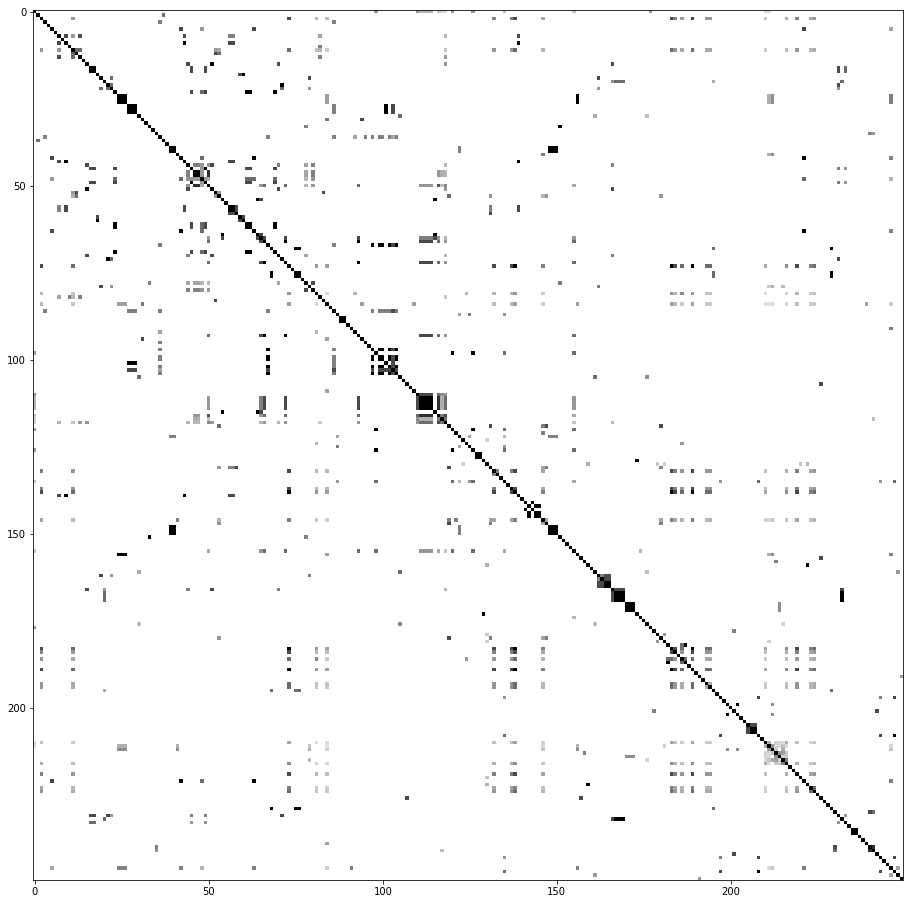

In [173]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))
plt.imshow(-similarity_weight.values[2250:2500,2250:2500], cmap='gray')
plt.show()